```{contents}
```

# Hyperparameter Tuning

* **$\epsilon$ (eps)**: neighborhood radius.
* **minPts**: minimum number of points required to form a dense cluster.

---

## **2. Hyperparameter Tuning**

### **Choosing $\epsilon$**

* Too small → many points become noise, clusters fragmented (underfitting).
* Too large → different clusters merge (overfitting, loss of structure).
* **Method**: *k-distance graph*

  1. Compute distance of each point to its $k$-th nearest neighbor ($k = \text{minPts}$).
  2. Sort these distances.
  3. Look for an “elbow” (sharp change). That distance is a good $\epsilon$.

### **Choosing minPts**

* Rule of thumb: $\text{minPts} \geq d+1$, where $d$ = data dimension.
* Larger datasets: minPts \~ log(n).
* Smaller minPts → risk of tiny spurious clusters.
* Larger minPts → risk of treating small real clusters as noise.

---

## **3. Overfitting vs Underfitting in DBSCAN**

* **Overfitting (too many small clusters, fragmented)**

  * Caused by very small $\epsilon$, small minPts.
  * Symptoms: many clusters, many outliers.
  * Fix: increase $\epsilon$ or minPts.

* **Underfitting (too few clusters, merged into one)**

  * Caused by large $\epsilon$, large minPts.
  * Symptoms: dataset collapses into 1 cluster or most points noise.
  * Fix: decrease $\epsilon$ or minPts.

---

## **4. Practical Tuning Workflow**

1. Standardize data (DBSCAN is distance-based).
2. Use **k-distance plot** to select $\epsilon$.
3. Choose minPts ≈ dimensionality × 2 (or log(n)).
4. Run DBSCAN, check metrics (Silhouette, Davies–Bouldin, ARI).
5. Adjust iteratively.

---

## **5. Alternatives when DBSCAN fails**

* **HDBSCAN**: extension that adapts to clusters with varying densities.
* **OPTICS**: similar but avoids picking a fixed $\epsilon$.

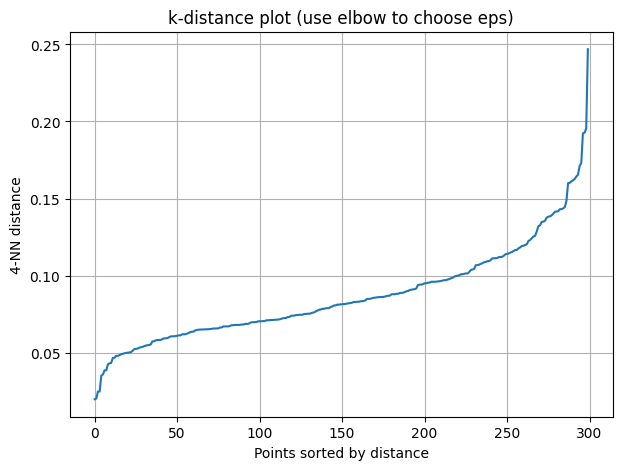

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import NearestNeighbors

# Generate data
X, _ = make_moons(n_samples=300, noise=0.08, random_state=42)

# Compute k-nearest neighbors distances (k = 4, as minPts rule of thumb for 2D)
k = 4
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, indices = nbrs.kneighbors(X)

# Take the k-th nearest neighbor distance for each point
k_distances = np.sort(distances[:, k-1])

# Plot k-distance graph to find epsilon "elbow"
plt.figure(figsize=(7,5))
plt.plot(k_distances)
plt.ylabel(f"{k}-NN distance")
plt.xlabel("Points sorted by distance")
plt.title("k-distance plot (use elbow to choose eps)")
plt.grid(True)
plt.show()
